# Produccion eléctrica en base a la metereología

La idea principal del trabajo es ser capaces de predecir como va a afectar a la produccion eléctrica de energias renovables y no renovables las precipitaciones, el viento y las horas de sol.
Como las horas de sol y el viento son fenomenos cuya causa efecto en principio es prácticamente inmediato, también vamos a centrarnos en la produccion de energia hidroelectrica para poder medir cuanto tiempo tarda en afectar a este tipo de energía las precipitaciones..

En base a esto tenemos varias cuestiones que queremos despejar:
- Que relación hay entre precipitaciones y el aumento de la generación de energia eléctrica hidráulica.
- Que relación hay entre horas de sol, temperatura y el aumento de la generación de energia eléctrica sólar.
- Que relación hay entre viento y el aumento de la generación de energia eléctrica eólica, esta relación esta condicionada por la temperatura, percipitaciones o horas de sol.
- Cuantos días tarda en aumentar la generación eléctrica de fuentes de energía renovables en función de los fenomenos metereológicos.
- Dados una prediccion meteorologica que valores de generación eléctrica tendremos para una fecha determinada.



Como premisas partimos de :
- Vamos a considerar solo el poll de energia que proporciona Red Electrica de España (REE)
- Vamos a considerar que las empresas no trabajan bajo mala praxis y que intentan optimizar el uso de energias renovables.
- Debido a la falta de datos a nivel diario de REE por provincia o comunidades autonomas, voy a centrar el analisis a nivel de sistema eléctrico (Peninsula, Baleares, Canarias ,Ceuta y Melilla).

Como origenes de datos para el estudio vamos a utilizar los datos proporcionados por:
- Información de REE (https://www.ree.es/es/apidatos) obtenida mediante su API.
- Datos proporcionados por aemet(https://opendata.aemet.es/centrodedescargas/inicio), vamos a utilizar la libreria  aemet desarrollada por Pablo Moreno (https://pypi.org/project/python-aemet/).

Requisitos para la ejecución del notebook:

Como requisitos para la ejecución del proyecto es necesario la instalación de la libreria python Aemet(pip install python-aemet) e instalar la libreria request.

Además las versiones de cada libreria utilizada en este proyecto son:

El modelo ha utilizar al tratarse de una prediccion númerica y no de obtener una etiqueta, sera una regresión.
Para poder llevar a cabo esa regresion se han pasado los valores de fechas a númericos, y se ha creado una columna por cada tipo de energia, creando varias variables objetivo.



In [2]:
# If the code is executed from Google Drive
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My\ Drive/TFM_Generacion_electrica_AEMET/Python

Mounted at /content/drive
/content/drive/My Drive/TFM_Generacion_electrica_AEMET/Python


In [4]:
!pip install python-aemet

     |████████████████████████████████| 409kB 9.0MB/s 


In [5]:
from Lectura_AEMET_REE import Ingestion_AEMET,Ingestion_REE
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

Ing_AEMET=Ingestion_AEMET()

Ing_REE=Ingestion_REE()

pd.options.display.max_columns=None




In [6]:
# put this in an input sentence
date_ini="2016-01-01T00:00:00UTC"
date_end="2021-12-31T00:00:00UTC"

#### Read data from AEMET & REE API 
[Click here](#From_api)

#### Read data from the repository  
[Click here](#From_csv)

# 1- Read data from API

###  Lectura datos AEMET <a id='From_api'></a>

Para la lectura de datos metereólogicos, vamos a utilizar la libreria aemet, de la que utilizaremos los metodos de las clases Aemet y Estacion para obtener los datos a nivel diario de cada estación meterologica para un rago de fechas, de las provincias que nos interesan para el estudio.<a id='From_api'></a>

In [7]:
#df_weather=Ing_AEMET.read_weather_dates(date_ini,date_end)

### Lectura de los datos de REE

Para la lectura de los datos de REE voy a utilizar la libreria python requests para a traves de su API, obtener la generación de electricidad en , para cada tipo de energia Electrica.

Una vez leidos los datos de la API, guardo los datos en formato json en un fichero. para no tener que repetir las consultas y poder trabajar sin conexion.

La estrutura de los datos leidos de REE es la siguiente:


Por lo que vamos a almacenar 2 ficheros:
    - Renovables
    - No Renovables



In [8]:
#df_ree=Ing_REE.read_ree_dates(date_ini,date_end)

### Saving Data to CSV

Para evitar tener que leer todos los datos en cada ejecucion, guardamos los en formato csv desde los DataFrame de REE y AEMET

In [ ]:
#Ing_AEMET.save_to_csv(df_weather)

#Ing_REE.save_to_csv(df_ree) 

# 2- Reading date from CSV<a id='From_csv'></a>

In [15]:
df_weather=Ing_AEMET.read_from_csv()
df_ree=Ing_REE.read_from_csv()

In [16]:
df_ree.head(4)

,value,percentage,datetime,title,type,system
0,29281.000,0.054518,2016-01-01T00:00:00.000+01:00,Hidráulica,Renovable,peninsular
1,35544.881,0.057414,2016-01-02T00:00:00.000+01:00,Hidráulica,Renovable,peninsular
2,35910.705,0.054150,2016-01-03T00:00:00.000+01:00,Hidráulica,Renovable,peninsular
3,65268.886,0.097287,2016-01-04T00:00:00.000+01:00,Hidráulica,Renovable,peninsular


In [17]:
df_weather.head(4)

,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,horatmin,tmax,horatmax,dir,velmedia,racha,horaracha,sol,presMax,horaPresMax,presMin,horaPresMin
0,2016-01-01,0252D,ARENYS DE MAR,BARCELONA,74,"11,2","0,2","7,8",06:20,"14,7",12:40,24.0,"1,7","7,2",14:00,NaN,NaN,NaN,NaN,NaN
1,2016-01-02,0252D,ARENYS DE MAR,BARCELONA,74,"11,8","0,0","7,5",23:40,"16,1",13:10,24.0,"1,1","9,7",11:40,NaN,NaN,NaN,NaN,NaN
2,2016-01-03,0252D,ARENYS DE MAR,BARCELONA,74,"10,0","0,0","5,8",05:50,"14,1",13:20,24.0,"1,9","9,2",16:00,NaN,NaN,NaN,NaN,NaN
3,2016-01-04,0252D,ARENYS DE MAR,BARCELONA,74,"11,6","0,9","8,0",22:50,"15,3",10:10,32.0,"0,8","8,9",02:40,NaN,NaN,NaN,NaN,NaN


## Limpieza datos AEMET

In [18]:
def limpieza(df,cols):
    for element in cols:
        df[element]=df[element].str.replace(',', '.')
        df[element]=pd.to_numeric(df[element],errors='coerce')
    return df

# Elimino las columnas que no me interesan
df_weather.drop(columns=['altitud','horaPresMax','horaPresMin','horaracha','dir','horatmin','horatmax'],inplace=True)

df_weather=limpieza(df_weather,df_weather.columns[5:])


In [19]:
# Gropued by provincia and fecha
# Explicar porque la media, max  min
df_weather_mean=df_weather.groupby(['provincia','fecha'],as_index=False)['prec','tmed','sol'].mean()
df_weather_max=df_weather.groupby(['provincia','fecha'],as_index=False)['tmax','presMax','racha'].max()
df_weather_min=df_weather.groupby(['provincia','fecha'],as_index=False)['tmin','presMin'].min()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


In [20]:
# Union of the 3 datasets by provincia and fecha
df_weather_group=pd.merge(df_weather_mean,df_weather_max, how='inner', on=['provincia','fecha'])
df_weather=pd.merge(df_weather_min,df_weather_group, how='inner', on=['provincia','fecha'])

In [ ]:
''' Creo una funcion que pase los indicadores a float 
y rellene los valores vacios por la media de las estaciones de esa provincia para ese dia'''

def rellena_nulos_provincia(df,cols):
    
    # Defino un DataFrame vacio para acumular el resultado
    df_all=pd.DataFrame()
    
    #Dataframe auxiliar para tener todas las provincias y dias para iterar
    df_aux=df_weather[['provincia','fecha']].drop_duplicates()
    
    # Hago un bucle para cada provincia y dia del DataFrame de entrada para ir tratando los datos a ese nivel.
    for prov,fecha in tqdm(df_aux.values):
        df_prov=[]
        df_prov=df[(df['provincia']==prov) & (df['fecha']==fecha)]
        
        #Para cada elemento de las columnas que nos interesan reemplazo , por ., paso a numerico y relleno los nulos por la media de la provincia
        for element in cols:
            df_prov[element]=df_prov[element].str.replace(',', '.')
            df_prov[element]=pd.to_numeric(df_prov[element],errors='coerce')
            #df_prov[element].fillna(df_prov[element].mean(skipna=True),inplace=True)
        df_all=df_all.append(df_prov)
    return df_all


In [21]:
electric_systems={
    'STA. CRUZ DE TENERIFE':'canarias',
    'LAS PALMAS':'canarias',
    'ILLES BALEARS':'baleares',
    'CEUTA':'ceuta',
    'MELILLA':'melilla'}

# Now each provincia have the same weigth in the DataFrame, we need to agrup by electric system to join the data after.

df_weather['system']=[electric_systems[l.upper()]  
                      if l.upper() in electric_systems.keys() else 'peninsular' 
                      for l in df_weather['provincia'] ]

weather_grouped=df_weather.groupby(['fecha','system'],as_index=False)
df_weather_system=weather_grouped.mean(['tmed','prec','tmin','tmax','velmedia','sol','presMax','presMin'])
df_weather_system

,fecha,system,tmin,presMin,prec,sol,tmax,presMax,racha
0,2016-01-01,baleares,3.300000,1009.300000,0.022222,1.940000,18.900000,1024.900000,14.200000
1,2016-01-01,canarias,7.900000,894.700000,0.000000,9.266667,24.250000,1025.450000,10.400000
2,2016-01-01,ceuta,13.800000,1012.400000,0.000000,7.600000,21.200000,1015.400000,10.800000
3,2016-01-01,melilla,10.600000,1016.600000,0.000000,9.100000,20.400000,1019.900000,5.600000
4,2016-01-01,peninsular,3.817021,921.165957,5.477102,2.231907,16.440426,984.380851,16.361702
...,...,...,...,...,...,...,...,...,...
9470,2021-03-09,baleares,3.600000,1003.100000,0.100000,6.300000,18.000000,1019.500000,18.100000
9471,2021-03-09,canarias,7.550000,890.050000,0.027083,7.025000,23.250000,1021.450000,20.400000
9472,2021-03-09,ceuta,9.600000,1004.900000,0.000000,9.100000,17.800000,1010.900000,9.700000
9473,2021-03-09,melilla,11.000000,1009.200000,0.600000,5.900000,17.800000,1014.300000,7.500000


# Limpieza de datos de REE

In [22]:
# Renombro los campos
df_ree.rename(columns={'value':'Generacion_Mwh','title':'Tecnologia','type':'Renov_norenov'},inplace=True)

# Elimino la columna percentage por ser una columna generada de Generacion_Mwh.
df_ree.drop('percentage',axis=1,inplace=True)

# Cambio los valores nulos de Generacion en Mwh por 0
df_ree['Generacion_Mwh'].fillna(0)

# Elimino las filas para las cuales la fecha es nula y paso la fecha a formato corto.
df_ree['fecha']=df_ree['datetime'].str[:10]
df_ree=df_ree[~df_ree['fecha'].isna()]
df_ree.drop('datetime',axis=1,inplace=True)
df_ree

,Generacion_Mwh,Tecnologia,Renov_norenov,system,fecha
0,29281.000,Hidráulica,Renovable,peninsular,2016-01-01
1,35544.881,Hidráulica,Renovable,peninsular,2016-01-02
2,35910.705,Hidráulica,Renovable,peninsular,2016-01-03
3,65268.886,Hidráulica,Renovable,peninsular,2016-01-04
4,79718.832,Hidráulica,Renovable,peninsular,2016-01-05
...,...,...,...,...,...
345,546.503,Generación total,Generación total,melilla,2021-03-08
346,559.067,Generación total,Generación total,melilla,2021-03-09
347,522.966,Generación total,Generación total,melilla,2021-03-10
348,527.659,Generación total,Generación total,melilla,2021-03-11


# Union of weather and generation data

In [23]:
df_ree_weather=pd.merge(df_ree,df_weather_system,how='inner',on=['fecha','system'])
df_ree_weather

,Generacion_Mwh,Tecnologia,Renov_norenov,system,fecha,tmin,presMin,prec,sol,tmax,presMax,racha
0,29281.000,Hidráulica,Renovable,peninsular,2016-01-01,3.817021,921.165957,5.477102,2.231907,16.440426,984.380851,16.361702
1,9782.273,Turbinación bombeo,No-Renovable,peninsular,2016-01-01,3.817021,921.165957,5.477102,2.231907,16.440426,984.380851,16.361702
2,162745.220,Nuclear,No-Renovable,peninsular,2016-01-01,3.817021,921.165957,5.477102,2.231907,16.440426,984.380851,16.361702
3,24401.321,Carbón,No-Renovable,peninsular,2016-01-01,3.817021,921.165957,5.477102,2.231907,16.440426,984.380851,16.361702
4,48452.794,Ciclo combinado,No-Renovable,peninsular,2016-01-01,3.817021,921.165957,5.477102,2.231907,16.440426,984.380851,16.361702
...,...,...,...,...,...,...,...,...,...,...,...,...
77429,546.503,Generación total,Generación total,melilla,2021-03-08,12.400000,1007.300000,19.600000,3.900000,17.600000,1010.100000,10.000000
77430,532.667,Motores diésel,No-Renovable,melilla,2021-03-09,11.000000,1009.200000,0.600000,5.900000,17.800000,1014.300000,7.500000
77431,13.200,Residuos no renovables,No-Renovable,melilla,2021-03-09,11.000000,1009.200000,0.600000,5.900000,17.800000,1014.300000,7.500000
77432,13.200,Residuos renovables,Renovable,melilla,2021-03-09,11.000000,1009.200000,0.600000,5.900000,17.800000,1014.300000,7.500000


# Análisis estadistico

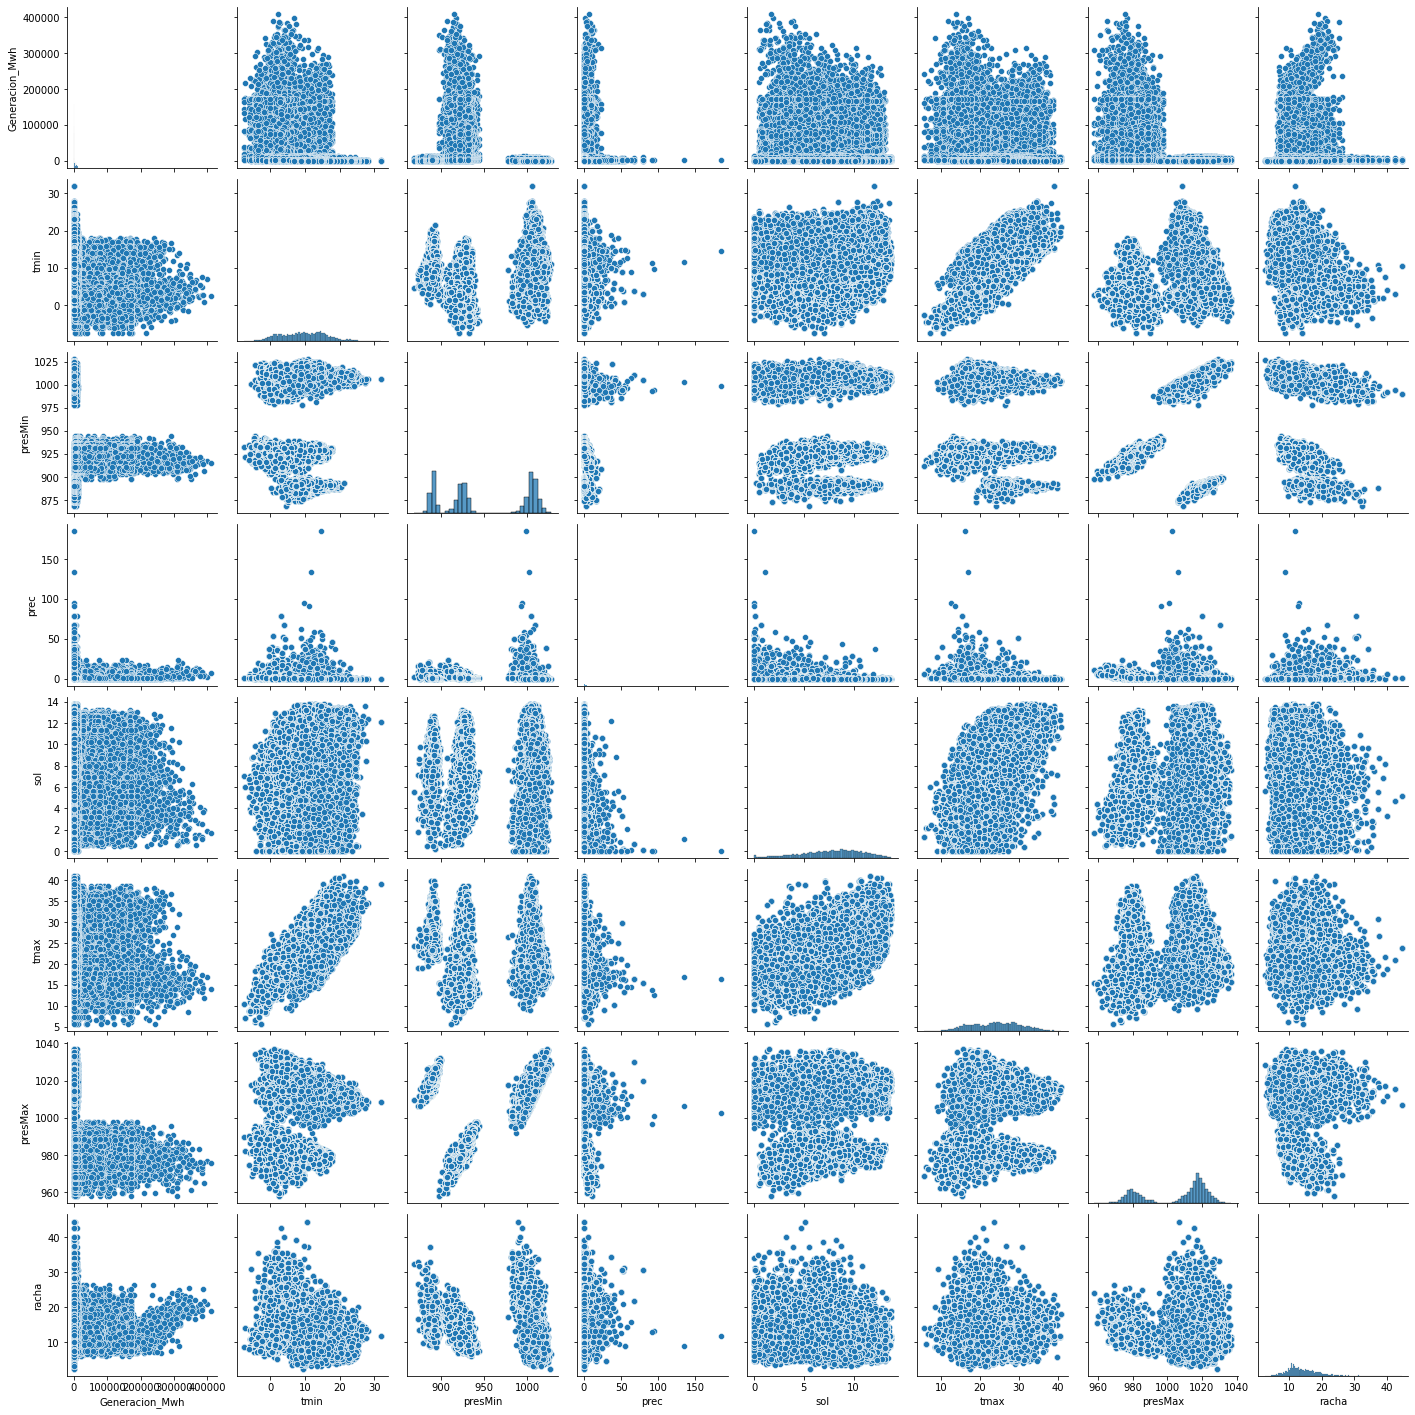

In [24]:
import seaborn as sns

sns.pairplot(df_ree_weather[~(df_ree_weather['Renov_norenov']=='Generación total')]);

Vemos que en funcion de la presion (minima y maxima):
    - Hay 2 grupos muy claramente diferenciandos para temperaturas , velocidad del viento y horas de sol.
    - Y 2 grupos pero no tan claramente diferenciados para las precipitaciones
    - Se ve claramente un dato outlier para precipitaciones y otro para temperatura minima

# Outlier

Vamos a buscar los outlier de precipitaciones y temperatura minima, por si fuesen datos erroneos.

### Outlier de Precipitaciones

El 28-04-2017 tenemos un dato máximo en la serie histórica de precipitaciones con 184,4mm en la estación de CEUTA, revisando el dato vemos que ese dato si es correcto y así lo recoge la propia AEMET.

https://aemetblog.es/2017/06/21/resumen-climatico-de-la-primavera-2017/

In [ ]:
maxprec_mm=df_weather[df_weather['prec']==df_weather['prec'].max()]['prec']
maxprec_fec=df_weather[df_weather['prec']==df_weather['prec'].max()]['fecha']
plt.figure(figsize=(15,6))

plt.scatter(df_weather['fecha'],df_weather['prec'],alpha=0.5)
plt.scatter(maxprec_fec,maxprec_mm,c='r');


In [ ]:
df_weather[df_weather['prec']==df_weather['prec'].max()]

### Outlier de Temperatura mínima

El 02-08-2020 tenemos un dato máximo en la serie histórica de temperaturas minimas de 31,8mm en la estación de MELILLA, revisando el dato vemos que ese dato si es correcto y así lo recogen varios periodicos de esos días

https://elfarodemelilla.es/aviso-naranja-altas-temperaturas-melilla-registrara-hoy-28-grados-minima/

In [ ]:
tminGrouped=df_weather.groupby('fecha')['tmin'].mean().reset_index()
maxtmin_celsius=df_weather[df_weather['tmin']==df_weather['tmin'].max()]['tmin']
maxtmin_fec=df_weather[df_weather['tmin']==df_weather['tmin'].max()]['fecha']

In [ ]:

plt.figure(figsize=(15,6))
plt.plot(tminGrouped['fecha'],tminGrouped['tmin'],c='k');
plt.scatter(df_weather['fecha'],df_weather['tmin'],alpha=0.2);
plt.scatter(maxtmin_fec,maxtmin_celsius,c='r');


In [ ]:
df_weather[df_weather['tmin']==df_weather['tmin'].max()]

# Features 

In [25]:
df_ree_weather.reset_index(inplace=True,drop=True) # Reset index to merge de info after the features tratment

## String variables Encoder

In [27]:
from sklearn.preprocessing import OneHotEncoder

enc=OneHotEncoder().fit(df_ree_weather[['Tecnologia','Renov_norenov','system']])

df_transform=enc.transform(df_ree_weather[['Tecnologia','Renov_norenov','system']])

column_names=enc.get_feature_names(['Tecnologia','Renov_norenov','system'])
df_onehot =  pd.DataFrame(df_transform.todense(), columns= column_names)

###  Tratamiento de fechas

Para pasar las fechas aun formato en que el salto entre el ultimo dia de un mes y el primer dia del siguiente sea continuo, uso los cosenos de los dias y meses. 

Para ello situo los valores de los 31 dias en angulos iguales calulandolos como $Dia(x)=\cos\frac{2\pi}{31}x$

Del mismo modo para los meses situo cada mes en $Mes(x)=\cos\frac{2\pi}{12}x$

In [31]:
df_ree_weather['year']=df_ree_weather['fecha'].str.slice(0,4)
df_ree_weather['day']=df_ree_weather['fecha'].str.slice(8,10)
df_ree_weather['month']=df_ree_weather['fecha'].str.slice(5,7)

In [32]:
df_ree_weather['day_t']=np.cos(((2*np.pi)/31)*df_ree_weather['day'].astype(int))
df_ree_weather['month_t']=np.cos(((2*np.pi)/12)*df_ree_weather['month'].astype(int))
df_ree_weather

,Generacion_Mwh,Tecnologia,Renov_norenov,system,fecha,tmin,presMin,prec,sol,tmax,presMax,racha,year,day,month,day_t,month_t
0,29281.000,Hidráulica,Renovable,peninsular,2016-01-01,3.817021,921.165957,5.477102,2.231907,16.440426,984.380851,16.361702,2016,01,01,0.979530,8.660254e-01
1,9782.273,Turbinación bombeo,No-Renovable,peninsular,2016-01-01,3.817021,921.165957,5.477102,2.231907,16.440426,984.380851,16.361702,2016,01,01,0.979530,8.660254e-01
2,162745.220,Nuclear,No-Renovable,peninsular,2016-01-01,3.817021,921.165957,5.477102,2.231907,16.440426,984.380851,16.361702,2016,01,01,0.979530,8.660254e-01
3,24401.321,Carbón,No-Renovable,peninsular,2016-01-01,3.817021,921.165957,5.477102,2.231907,16.440426,984.380851,16.361702,2016,01,01,0.979530,8.660254e-01
4,48452.794,Ciclo combinado,No-Renovable,peninsular,2016-01-01,3.817021,921.165957,5.477102,2.231907,16.440426,984.380851,16.361702,2016,01,01,0.979530,8.660254e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77429,546.503,Generación total,Generación total,melilla,2021-03-08,12.400000,1007.300000,19.600000,3.900000,17.600000,1010.100000,10.000000,2021,08,03,-0.050649,6.123234e-17
77430,532.667,Motores diésel,No-Renovable,melilla,2021-03-09,11.000000,1009.200000,0.600000,5.900000,17.800000,1014.300000,7.500000,2021,09,03,-0.250653,6.123234e-17
77431,13.200,Residuos no renovables,No-Renovable,melilla,2021-03-09,11.000000,1009.200000,0.600000,5.900000,17.800000,1014.300000,7.500000,2021,09,03,-0.250653,6.123234e-17
77432,13.200,Residuos renovables,Renovable,melilla,2021-03-09,11.000000,1009.200000,0.600000,5.900000,17.800000,1014.300000,7.500000,2021,09,03,-0.250653,6.123234e-17


In [ ]:
df_ree_system.drop(['month','day','Tecnologia','Renov_norenov','system'],axis=1,inplace=True)

# Unir las 2 tablas  df_ree_system, df_onehot

In [ ]:
df_ree_features=pd.merge(df_ree_system,df_onehot, how='inner', left_index=True,right_index=True)
df_ree_features

In [ ]:

# df_tratado=pd.merge(df_ree_features,df_weather,how='inner', on='fecha')
# df_tratado.drop(['year_x','day_t_x','month_t_x'],axis=1,inplace=True)

In [ ]:


df_tratado_num=df_ree_features.select_dtypes(np.number)
df_tratado_num

# Models

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV

target='Generacion_Mwh'

y=df_tratado_num[target]
X=df_tratado_num.drop([target],axis=1)



reg_KN=GridSearchCV(KNeighborsRegressor(),param_grid={"n_neighbors":np.arange(3,15)},scoring='neg_mean_absolute_error')
reg_KN.fit(X,y)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

reg_DT=GridSearchCV(DecisionTreeRegressor(),param_grid={'max_depth':range(3,100)},scoring='neg_mean_absolute_error')
reg_DT.fit(X,y)

# Evaluation

Crear tabla de resultados.

In [ ]:
print(reg_KN.best_score_)
print(reg_KN.best_params_)

In [ ]:
print(reg_DT.best_score_)
print(reg_DT.best_params_)

# Interfaz y ploteado
